(vector_calculus)=
# Vector calculus
```{index} Vector calculus
```

## Vector functions

**Vector** is a quantity that is described with magnitude and direction. A _vector function_ describes a vector whole value is a function of some independent variable.

For example, if $f(t)$ represents a real function of $t$, then vector function of $t$ would be:
\begin{equation}
\mathbf{F}(t)=[f_x(t), f_y(t), f_z(t)].
\end{equation}

We can visualise a vector in Cartesian (x, y, z) cooridante system as an arrow beginning at the origin and ending at point specified by the vector:

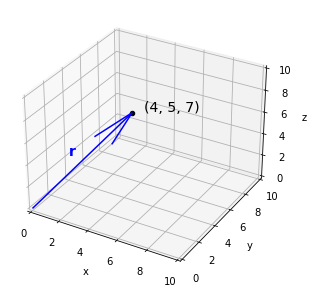

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create plot
fig = plt.figure(figsize=(7,5))

# Add subplot with 3D axes projection
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, 4, 5, 7,
          color="blue")
## 散点黑色
ax.scatter(4, 5, 7, c="black")
# 文字
ax.text(4.5, 5.5, 7, "(4, 5, 7)", fontsize=14)
ax.text(2, 1, 5, "$\mathbf{r}$", fontsize=14, color="blue")
# 标签
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# 轴范围
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)

plt.show()

Vector (4, 5, 7) can be represented with _position vector_ $\mathbf{r}$ plotted on the graph.

**Example:**

Describe the shape of the geometric representation of the vector function given by
\begin{equation}
\mathbf{F}(t)=[t+(t/10)\sin{t}, t+(t/10)\cos{t}].
\end{equation}

In [3]:
t = np.linspace(0,100, 301)

def F(t):
    return np.array([t+t/10*np.sin(t), t+(t/10.)*np.cos(t)])

t1 = np.linspace(0, 30, 200)
t2 = np.linspace(0, 50, 200)
t3 = np.linspace(0, 90, 200)
#print(F(t1)[0])
#print(F(t1)[0,-1])

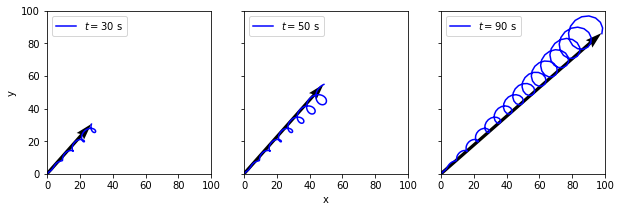

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10,3), sharey=True)

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

ax1.plot(F(t1)[0], F(t1)[1], label="$t=30$ s", color="blue")
ax2.plot(F(t2)[0], F(t2)[1], label="$t=50$ s", color="blue")
ax3.plot(F(t3)[0], F(t3)[1], label="$t=90$ s", color="blue")

ax1.quiver(0, 0, F(t1)[0,-1], F(t1)[1,-1],
           scale=1, scale_units="xy", width=0.02)

ax2.quiver(0, 0, F(t2)[0,-1], F(t2)[1,-1],
           scale=1, scale_units="xy", width=0.02)

ax3.quiver(0, 0, F(t3)[0,-1], F(t3)[1,-1], 
           scale=1, scale_units="xy", width=0.02)

for ax in axes:
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    ax.legend(loc="upper left")
    
ax1.set_ylabel("y")
ax2.set_xlabel("x")


plt.show()

### Differentiation
```{index} Vector differentiation
```
To differentiate vector functions, we need to take derivatives of its components:
\begin{equation}
\frac{d\mathbf{F}}{dt}=\Big(\frac{df_x}{dt}, \frac{df_y}{dt}, \frac{df_z}{dt}\Big).
\end{equation}

**Example:**

Let's find the derivative of $\mathbf{F}(t)=[t+(t/10)\sin{t}, t+(t/10)\cos{t}]$ with respect to $t$. We will differentiate each component to get:

\begin{equation}\frac{d\mathbf{F}}{dt}=\Big[\Big(1+\frac{1}{10}\sin{t}+\frac{t}{10}\cos{t}\Big), \Big(1+\frac{1}{10}\cos{t}-\frac{t}{10}\sin{t}\Big) \Big].
\end{equation}

We can also use [SymPy](https://www.sympy.org/en/index.html) package for Python that allows symbolic mathematics. With this package we can get analytical solutions to derivatives in this example. At first we can create separate derivatives:

```{index} SymPy: differentiation
```

In [5]:
import sympy as sym
from IPython.display import display
from sympy import init_printing

init_printing(use_latex='mathjax')

# Create a symbol t variable will go by
t = sym.Symbol("t")

# Differentiate Fx with respect to t
print('dfx/dt =')
display(sym.diff(t+(t/10)*sym.sin(t), t))

# Differentiate Fy with respect to t
print('dfy/dt =')
display(sym.diff(t+(t/10)*sym.cos(t), t))

dfx/dt =


t⋅cos(t)   sin(t)    
──────── + ────── + 1
   10        10      

dfy/dt =


  t⋅sin(t)   cos(t)    
- ──────── + ────── + 1
     10        10      

**How can we represent vector differentiation geometrically?**

For that, we will use the position vector $\mathbf{r}$.  Letting $\mathbf{F}(t)=\mathbf{r}(t):$

$$\frac{d\mathbf{F}}{dt}=\frac{d\mathbf{r}}{dt}=\lim_{\delta t \rightarrow 0}\frac{\mathbf{r}(t+\delta t)-\mathbf{r}(t)}{\delta t}=\Big(\frac{dx}{dt}, \frac{dy}{dt}, \frac{dz}{dt}\Big).$$

Let's find tangent $\mathbf{t}(t)$ to the curve created by $\mathbf{r}(t)=[10+5\sin{t}, 10+5\cos{t}]$ as $t$ goes from 0 to $2\pi$.

In [6]:
t = sym.Symbol("t")

print('dx/dt =')
display(sym.diff(10+5*sym.sin(t)))

print('dy/dt =')
display(sym.diff(10+5*sym.cos(t)))

dx/dt =


5⋅cos(t)

dy/dt =


-5⋅sin(t)

In [7]:
def r(t):
    return np.array([10+5*np.sin(t), 10+5*np.cos(t)])

def dr(t):
    return np.array([5*np.cos(t), -5*np.sin(t)])

Unit tangent $\hat{\mathbf{t}}$ to the curve $C$ can be defined as:
\begin{equation}
\hat{\mathbf{t}}=\frac{d\mathbf{r}/dt}{|d\mathbf{r}/dt|}.
\end{equation}

Unit tangent is a vector in the same direction as vector derivative but its length is one.

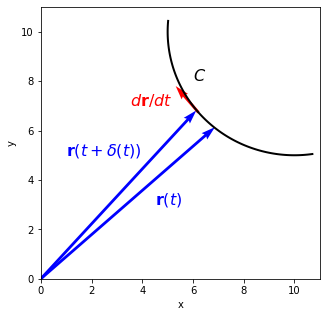

In [8]:
t = np.linspace(3,4.8,100)

plt.figure(figsize=(5,5))

plt.plot(r(t)[0], r(t)[1], color="black",
        lw=2)


plt.quiver(0, 0, r(3.8)[0], r(3.8)[1],
           color="blue", scale=1,
           scale_units="xy", width=0.01)

plt.quiver(0, 0, r(4)[0], r(4)[1],
           color="blue", scale=1,
           scale_units="xy", width=0.01)

# Calculate dr(4) unit vector
# linalg.norm gets the length of a vector
x = (dr(4)/np.linalg.norm(dr(4)))[0]
y = (dr(4)/np.linalg.norm(dr(4)))[1]

# Plot unit vector exaggerated
plt.quiver(r(4)[0], r(4)[1],
           x, y,
           scale=8, color="red", width=0.01)

plt.text(4.5, 3, r"$\mathbf{r}(t)$", color="blue",
         fontsize=16)

plt.text(1, 5, r"$\mathbf{r}(t+\delta(t))$", color="blue",
         fontsize=16)

plt.text(6, 8, r"$C$", color="black", fontsize=16)
plt.text(3.5, 7, r"$d\mathbf{r}/dt$", color="red", fontsize=16)

plt.xlim(0,11)
plt.ylim(0,11)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

{admonition} Differentiation rules

If vectors $\mathbf{a}$, $\mathbf{b}$ and scalar $\lambda$ are functions of $t$, we can then differentiate:

$ [\frac{d}{dt}(\mathbf{a+b})=\frac{d\mathbf{a}}{dt}+\frac{d\mathbf{b}}{dt}]$
$ [\frac{d}{dt}(\lambda\mathbf{a})=\frac{d\lambda}{dt}\mathbf{a}+\frac{d\mathbf{a}}{dt}\lambda,\\] $ 
$
[\frac{d}{dt}(\mathbf{a\cdot b})=\frac{d\mathbf{a}}{dt}\cdot\mathbf{b}+\frac{d\mathbf{b}}{dt}\cdot\mathbf{a}=\frac{d}{dt}(\mathbf{b\cdot a}),\\]$
$ [\frac{d}{dt}(\mathbf{a\times b})=\frac{d\mathbf{a}}{dt}\times\mathbf{b}+\frac{d\mathbf{b}}{dt}\times\mathbf{a}\neq \frac{d}{dt}(\mathbf{b\times a}).\\] 
$ 


## Scalar and vector fields
```{index} Scalar and vector fields
```
**Scalar field** is a scalar quantity that varies with position and can be written as $\Omega(x,y,z)=\Omega(\mathbf{r})$. Scalar fields are for example temperature and density. 3D scalar fields can be represented as iso-surfaces in 3D or contour plots in 2D for specific $z$ value.

For example, let's plot a scalar field:

$$f(x,y,z)=ze^{-xy}$$

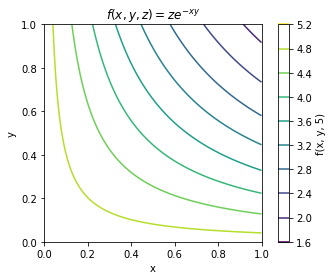

In [9]:
# Create x and y values between 0 and 1
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

# Create 2D grid ourt of x and y
X, Y = np.meshgrid(x, y)
Z = 5

# Create a contour plot
plt.contour(X, Y, Z*np.exp(-X*Y))

plt.colorbar(label="f(x, y, %g)" % Z)

plt.title(r"$f(x, y, z) = ze^{-xy}$")
plt.xlabel("x")
plt.ylabel("y")

plt.gca().set_aspect("equal")

plt.show()

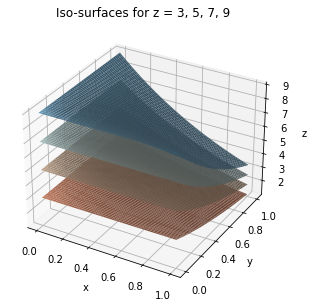

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Create plot
fig = plt.figure(figsize=(7,5))

# Add subplot with 3D axes projection
ax = fig.add_subplot(111, projection='3d')

colours = ["lightsalmon", "peachpuff", "lightcyan", "lightskyblue"]

# Plot surface
for idx, z in enumerate(range(3,10,2)):
    ax.plot_surface(X, Y, z*np.exp(-X*Y), color=colours[idx])
    
# Add extras
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_title("Iso-surfaces for z = 3, 5, 7, 9")

# Display
plt.show()

**Vector field** is a vector quantity that varies as a function of position and can be written as $\mathbf{F}(x,y,z)=\mathbf{F}(\mathbf{r})$. A vector field is for example ocean currents or wind field.

One way to visualise vector field is to use a _quiver plot_, where at each location we can draw an arrow with length and direction based on magnitude and direction of the field at that location. Quiver plots in Python can be plotted using 2D array of locations and x and y components of vector field at each location:

```{index} Quiver plot
```

In [11]:
# Locations
x = np.linspace(0, 2*np.pi, 20)
y = np.linspace(0, 2*np.pi, 20)

X, Y = np.meshgrid(x,y)

# x and y components of the field
U = np.sin(X)**2
V = np.cos(Y)**2

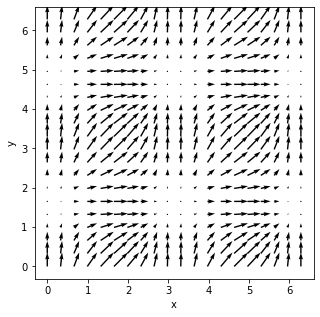

In [12]:
plt.figure(figsize=(5,5))
plt.quiver(X, Y, U, V, scale=20,
          width=0.005)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

Vector fields can also be expressed with _streamline plots_. Vector field is tangent to the streamlines:
```{index} Streamline plot
````

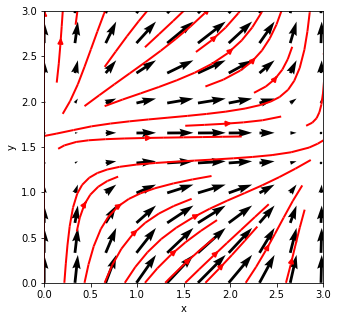

In [13]:
plt.figure(figsize=(5,5))

plt.quiver(X, Y, U, V, scale=10, width=0.01)

plt.streamplot(X, Y, U, V, color="red", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(0,3)
plt.ylim(0,3)

plt.show()

### Derivatives
#### Gradient of a scalar field
```{index} Gradient of a scalar field
```
We can take derivatives of a scalar field in three directions $x$, $y$ and $z$. Three derivatives then create a vector field known as _gradient_:

$$\nabla\Omega = \Big(\frac{\partial\Omega}{\partial x}, \frac{\partial \Omega}{\partial y}, \frac{\partial\Omega}{\partial z}\Big).$$

The $\nabla$ symbol is known as "nabla" or "del" and it is defined as:

$$\nabla = \Big(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial }{\partial z}\Big).$$

The vector $\nabla\Omega$ represents the rate of change of $\Omega$ in space.

Let's use SymPy to find gradient of a scalar field

$$\Omega=x^2+xy+y^2.$$

In [14]:
from sympy.vector import gradient, CoordSys3D

R = CoordSys3D(' ')

Omega = R.x**2+R.x*R.y+R.y**2

# Print omega
display(Omega)

# Print grad omega
display(gradient(Omega))

   2                2
x_   + x_ ⋅y_  + y_  

(2⋅x_  + y_ ) i_  + (x_  + 2⋅y_ ) j_ 

The gradient becomes a vector in $\hat{\mathbf{i}}$ (x) and $\hat{\mathbf{j}}$ (y) directions.

Let's create a contour plot of scalar field $\Omega$ and quiver plot of $\nabla\Omega$.

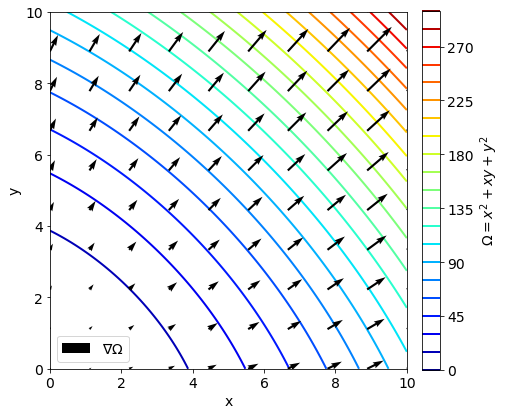

In [15]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(7,7))

x = np.linspace(0,10,100)
y = np.linspace(0,10,100)

X, Y = np.meshgrid(x, y)

Omega = X**2+X*Y+Y**2

# Create contour plot of scalar field
plt.contour(X, Y, Omega, 20, cmap="jet",
           zorder=1, linewidths=2)

plt.colorbar(label=r"$\Omega=x^2+xy+y^2$",
             fraction=0.046, pad=0.04)

x = np.linspace(0,10,10)
y = np.linspace(0,10,10)

X, Y = np.meshgrid(x, y)

# Create quiver plot of the gradient
plt.quiver(X, Y, 2*X+Y, X+2*Y,
           label=r"$\nabla\Omega$", zorder=2)

plt.legend(loc="lower left")

plt.xlabel("x")
plt.ylabel("y")

plt.gca().set_aspect("equal")

plt.show()

Scalar field $\Omega$ will vary at different rate in different directions. The _directional derivative_ of a unit vector $\hat{\mathbf{a}}$ is:
\begin{equation}
\frac{\partial \Omega }{\partial a}=\hat{\mathbf{a}}\cdot\nabla\Omega.
\end{equation}

For example, we are given scalar field $\Omega = x^2yz+4xz^2$ and we would like to know its derivative in the direction of $\mathbf{a}=(2,-1,-1)$ at point $P=(1,-2,-1)$.

First, we need to find $\hat{\mathbf{a}}$:

In [16]:
a = np.array([2,-1,-1])

a_len = np.linalg.norm(a)

a_hat = a/a_len

print(a)
print(a_hat)

[ 2 -1 -1]
[ 0.81649658 -0.40824829 -0.40824829]


Through SymPy we can find the gradient of $\Omega$:
```{index} SymPy: gradient
```

In [17]:
R = CoordSys3D(' ')

Omega = R.x**2*R.y*R.z+4*R.x*R.z**2

# Print omega
display(Omega)

# Print grad omega
display(gradient(Omega))

   2                    2
x_  ⋅y_ ⋅z_  + 4⋅x_ ⋅z_  

⎛                     2⎞        ⎛   2    ⎞        ⎛   2                ⎞     
⎝2⋅x_ ⋅y_ ⋅z_  + 4⋅z_  ⎠ i_   + ⎝x_  ⋅z_ ⎠ j_   + ⎝x_  ⋅y_  + 8⋅x_ ⋅z_ ⎠ k_  

The directional derivative is a dot product between unit vector $\hat{\mathbf{a}}$ and $\nabla\Omega$:

$$\hat{\mathbf{a}}\cdot\nabla\Omega=0.816\times(2xyz+4z^2)-0.408\times(x^2z)-0.408\times(x^2y+8xz).$$

Now, we can evaluate it at point $P$:

In [18]:
P = np.array([1,-2,1])

print(a_hat[0]*(2*P[0]*P[1]*P[2]+4*P[2]**2)+a_hat[1]*P[0]**2*P[2]+a_hat[2]*(P[0]**2*P[1]+8*P[0]*P[2]))

-2.8577380332470415


#### The divergence of a vector field
```{index} Divergence of a vector field
```
The _divergence_ of a vector field $\mathbf{F}=(f_x, f_y, fz)$ is:

$$\text{div}\mathbf{F}=\nabla\cdot\mathbf{F}=\frac{\partial f_x}{\partial x}+\frac{\partial f_y}{\partial y}+\frac{\partial z}{\partial z}.$$

For example, take divergence of a vector field $\mathbf{F}=(x^2,3y,x^3)$:

```{index} SymPy: divergence
```

In [19]:
from sympy.vector import divergence
R = CoordSys3D(' ')
v1 = R.x**2*R.i+ 3*R.y*R.j+R.x**3*R.k
v1

⎛   2⎞                      ⎛   3⎞     
⎝x_  ⎠ i_   + (3⋅y_ ) j_  + ⎝x_  ⎠ k_  

In [20]:
divergence(v1)

2⋅x_  + 3

If divergence is applied to the flow velocity of some fluid, the divergence represents the net amount of fluid entering or leaving a particular point. The divergence is zero for incompressible fluids. Positive divergence implies that density of the fluid decreases at that location, while negative divergence suggests it is increasing.

If we look at the field $\mathbf{F}(x,y)=(x,y)$, its divergence is:

In [21]:
v1 = R.x*R.i+ R.y*R.j
divergence(v1)

2

If that field indicated flow velocity, the positive divergence would mean flow increasing outward, which can indeed be seen in a quiver plot:

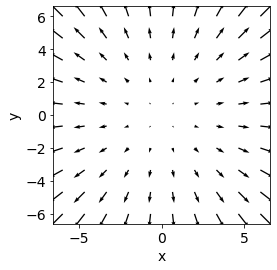

In [22]:
x = np.linspace(-6, 6, 10)
y = np.linspace(-6, 6, 10)

X, Y = np.meshgrid(x, y)

plt.quiver(X, Y, X, Y)
plt.gca().set_aspect("equal")

plt.xlabel("x")
plt.ylabel("y")

plt.show()



## [Python中绘制坡度场基本语法：](https://uva.sowiso.nl/courses/theory/112/105/13860/en)
$\frac{{dy}}{{dt}} = \varphi \left( {t,y} \right)$

import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(tmin, tmax, tpoints)
y = np.linspace(ymin, ymax, ypoints)
t, y = np.meshgrid(t, y)
dy = phi(t,y);
dt = 1;
plt.figure();
plt.quiver(t, y, dt, dy, pivot='middle', headwidth=1, headlength=0.01);

## example
$\varphi \left( {t,y} \right) = 1 - 2ty$

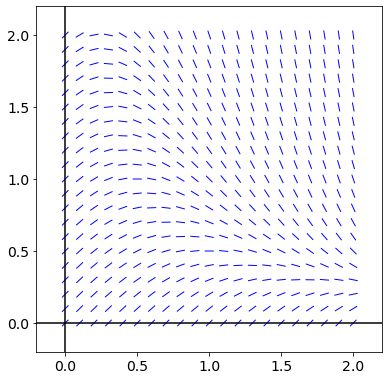

In [52]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,2,21)
y = np.linspace(0,2,21)
t, y = np.meshgrid(t,y)
dt = 1.0
dy = 1.0 - 2.0*t*y
L = np.sqrt(dt*dt+dy*dy)
dt = dt/L
dy = dy/L

fig  = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_xlim([-0.2,2.2])
ax.set_ylim([-0.2,2.2])
ax.add_line(plt.Line2D((-0.2,2.2), (0.0,0.0), color='black'))
ax.add_line(plt.Line2D((0.0, 0.0), (-0.2,2.2), color='black'))
plt.quiver(t, y, dt, dy, pivot='middle', headwidth=1, headlength=0.01, color='blue')
plt.show()

#### Curl of a vector field
```{index} Curl of a vector field
```

_Curl_ of a vector field is defined as:

$$\text{curl}\mathbf{F}=\nabla\times\mathbf{F}=\Big(\frac{\partial f_z}{\partial y}-\frac{\partial f_y}{\partial z}\Big)\hat{\mathbf{i}}+\Big(\frac{\partial f_x}{\partial z}-\frac{\partial f_z}{\partial x}\Big)\hat{\mathbf{j}}+\Big(\frac{\partial f_y}{\partial x}-\frac{\partial f_x}{\partial y}\Big)\hat{\mathbf{k}}.$$

The result is another vector field. For example, let's take divergence of a vector field $\mathbf{F}=(z,x,y)$:

$$\nabla\times\mathbf{F}=(1-0)\hat{\mathbf{i}}+(1-0)\hat{\mathbf{j}}+(1-0)\hat{\mathbf{k}}=\hat{\mathbf{i}}+\hat{\mathbf{j}}+\hat{\mathbf{k}}.$$

To check our answer we can use SymPy:
```{index} SymPy: curl
```

In [24]:
from sympy.vector import curl
R = CoordSys3D(' ')
v1 = R.z*R.i+ R.x*R.j+R.y*R.k
curl(v1)

i_  + j_  + k_ 

#### Curl of a vector field that is a gradient of a scalar field

If we take a gradient of a scalar field $\Omega$ and take a curl of that field, the identity states:

$$\nabla\times(\nabla\Omega)=0.$$

Curl of a gradient field is always zero. We can check what SymPy returns:

In [25]:
Omega = R.x**2*R.y*R.z+4*R.x*R.z**2
curl(gradient(Omega))

0

#### Laplacian
```{index} Laplacian for scalar/vector fields
```
Laplacian is defined as:

$$\nabla^2 = \nabla\cdot\nabla=\frac{\partial^2}{\partial x^2}$$

Laplacian can operate on both scalar and vector fields. For a vector field, it is defined as:

$$\nabla^2\mathbf{F}=(\nabla^2f_x,\nabla^2f_y,\nabla^2f_z).$$

If we take $\Omega = x^2yz+4*xz^2$, then Laplacian would be:

In [26]:
divergence(gradient(Omega))

8⋅x_  + 2⋅y_ ⋅z_ 

If we take $\mathbf{F}=x^2yz\hat{\mathbf{i}}+xyz^2\hat{\mathbf{j}}+(xy-2y^2+2x^2z)\hat{\mathbf{k}}$, then we can calculate $\nabla^2f_x,\nabla^2f_y,\nabla^2f_z$:

In [27]:
F = R.x**2*R.y*R.z*R.i+R.x*R.y*R.z**2*R.j +(R.x*R.y-2*R.y**2+2*R.x**2*R.z)*R.k
F

⎛   2        ⎞        ⎛           2⎞        ⎛     2                      2⎞   
⎝x_  ⋅y_ ⋅z_ ⎠ i_   + ⎝x_ ⋅y_ ⋅z_  ⎠ j_   + ⎝2⋅x_  ⋅z_  + x_ ⋅y_  - 2⋅y_  ⎠ k_

  
  

The $\nabla^2f_x$ is:

In [28]:
divergence(gradient(R.x**2*R.y*R.z))

2⋅y_ ⋅z_ 

The $\nabla^2f_y$:

In [29]:
divergence(gradient(R.x*R.y*R.z**2))

2⋅x_ ⋅y_ 

The $\nabla^2f_z$:

In [30]:
divergence(gradient((R.x*R.y-2*R.y**2+2*R.x**2*R.z)))


4⋅z_  - 4

## intro to calculus.pdf coding exercise
## Maths Methods 1
## Lecture 3 (Vector calculus)

In [31]:
import numpy
import pylab
from sympy import sin, cos, exp, Function, Symbol, diff, integrate, solve
from math import pi
import matplotlib.mlab as mlab

###### SCALAR FIELDS ######
###### Lecture 3, slide 3 ######
 Create a mesh of 2D Cartesian coordinates, where -5 <= x <= 5 and -5 <= y <= 5

In [32]:
x = numpy.arange(-5.0, 5.0, 0.025)
y = numpy.arange(-5.0, 5.0, 0.025)
X, Y = numpy.meshgrid(x, y)

 Computes the value of the scalar field at each (x,y) coordinate, and stores it in Z.

In [33]:
Z = 16 - 2*(X**2) - Y**2 + X*Y

The scalar field on a contour plot


Plotting contours of the scalar field f(x,y) = 16 - 2*(x**2) - y**2 + x*y...


Text(0, 0.5, 'y')

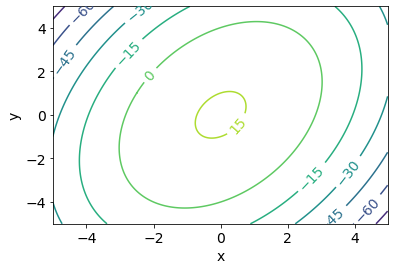

In [34]:
print ("\nPlotting contours of the scalar field f(x,y) = 16 - 2*(x**2) - y**2 + x*y...")
fig = pylab.figure()
contour_plot = pylab.contour(X, Y, Z)
pylab.clabel(contour_plot, inline=1)
pylab.xlabel("x")
pylab.ylabel("y")

###### VECTOR FIELDS ######
###### Lecture 3, slide 4 ######
 Create a mesh of 2D Cartesian coordinates, where -5 <= x <= 5 and -5 <= y <= 5

In [35]:
x = numpy.arange(-5.0, 5.0, 0.25)
y = numpy.arange(-5.0, 5.0, 0.25)
X, Y = numpy.meshgrid(x, y)

 Computes the value of the vector field at each (x,y) coordinate.
 Z1 and Z2 hold the i and j component of the vector field respectively.

In [36]:
Z1 = -(X**2)
Z2 = -(Y**2)


Plotting the vector field f(x,y) = [-x**2, -y**2] ...


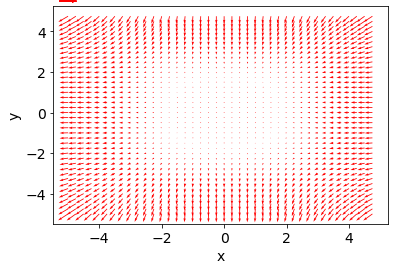

In [37]:
print ("\nPlotting the vector field f(x,y) = [-x**2, -y**2] ...")
fig = pylab.figure()
plt = pylab.quiver(X,Y,Z1,Z2,angles='xy',scale=1000,color='r')
pylab.quiverkey(plt,-5,5.5,50,"50 units",coordinates='data',color='r')
pylab.xlabel("x")
pylab.ylabel("y")
pylab.show()

###### GRADIENTS ######
###### Lecture 3, slide 6 ######

Define the independent variables using Symbol

In [38]:
x = Symbol("x")
y = Symbol("y")
# Define the function f(x,y)
f = 16 - 2*(x**2) - y**2 + x*y

In [39]:
# The gradient of f (a scalar field) is a vector field:
grad_f = [diff(f,x), diff(f,y)]
print ("\nThe gradient of the scalar field f(x,y) = 16 - 2*(x**2) - y**2 + x*y is: ")
print (grad_f)


The gradient of the scalar field f(x,y) = 16 - 2*(x**2) - y**2 + x*y is: 
[-4*x + y, x - 2*y]


In [40]:
print ("\nThe point where the gradient is zero is: ")
# We solve a simultaneous equation such that grad_f[0] == 0 and grad_f[1] == 0
print (solve([grad_f[0], grad_f[1]], [x, y]))


The point where the gradient is zero is: 
{x: 0, y: 0}


###### DIRECTIONAL DERIVATIVES ######
###### Lecture 3, slide 12 ######
 Define the independent variables using Symbol

In [41]:
x = Symbol("x")
y = Symbol("y")
# Define the function h(x,y)
h = 3*x*(y**2)

In [42]:
# The gradient of h
grad_h = [diff(h,x), diff(h,y)]
print ("\nThe gradient of h(x,y) = 3*x*(y**2) is: ")
print (grad_h)


The gradient of h(x,y) = 3*x*(y**2) is: 
[3*y**2, 6*x*y]


In [43]:
print ("\nAt the point (1,2), the gradient is: ")
# Use evalf to evaluate a function, with subs to substitute in specific values for x and 
y
grad_h_at_point = [grad_h[0].evalf(subs={x:1, y:2}), grad_h[1].evalf(subs={x:1, y:2})]
print (grad_h_at_point)
# Find the unit vector in the direction 3i + 4j
a = numpy.array([3, 4])
a_magnitude = numpy.linalg.norm(a, ord=2)
unit_a = a/a_magnitude
print ("\nThe unit vector in the direction 3i + 4j is:")
print (unit_a)
# Dot product to get the directional derivative 
# (i.e. the gradient of h in the direction of the vector unit_a)
slope = numpy.dot(grad_h_at_point, unit_a)
print ("\nThe slope of h in the direction ", unit_a, " at (1,2) is: ", slope)


At the point (1,2), the gradient is: 
[12.0000000000000, 12.0000000000000]

The unit vector in the direction 3i + 4j is:
[0.6 0.8]

The slope of h in the direction  [0.6 0.8]  at (1,2) is:  16.8000000000000


###### DIVERGENCE ######
###### Lecture 3, slide 15 ######
# Define the independent variables using Symbol

In [44]:
x = Symbol("x")
y = Symbol("y")
# Define the vector field v(x,y)
v = [-(x**2), -(y**2)]

In [45]:
# Compute the divergence using diff. 
# NOTE 1: A neater way would be to use SymPy’s dot function. 
# However, there doesn’t seem to be a way of defining a gradient vector
# in SymPy without specifying the function we wish to operate on,
# so we’ll compute the divergence the long way.
# NOTE 2: this is the dot product of the gradient vector and v,
# which will always result in a scalar.
# d/dx is applied to the first component of v (i.e. v[0]),
# d/dy is applied to the second component of v (i.e. v[1])
divergence = diff(v[0],x) + diff(v[1],y)
print ("\nThe divergence of the vector field ", v, " is: ")
print (divergence)


The divergence of the vector field  [-x**2, -y**2]  is: 
-2*x - 2*y


###### CURL ######
###### Lecture 3, slide 19 ######

In [46]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the vector field v(x,y)
v = [cos(pi*y), -cos(pi*x)]
# Compute the curl using diff.
# Remember: the curl of a vector always results in another vector.
# The first two components of the curl are zero because v has a zero k-component.
curl = [0, 0, diff(v[1], x) - diff(v[0], y)]
print ("\nThe curl of the vector field ", v, " is: ")
print (curl)
print ("\nAt the point (0, -0.5), the curl is: ")
print ([0, 0, curl[2].evalf(subs={x:0, y:-0.5})])


The curl of the vector field  [cos(3.14159265358979*y), -cos(3.14159265358979*x)]  is: 
[0, 0, 3.14159265358979*sin(3.14159265358979*x) + 3.14159265358979*sin(3.14159265358979*y)]

At the point (0, -0.5), the curl is: 
[0, 0, -3.14159265358979]


###### LAPLACIAN ######
###### Lecture 3, slide 22 ######

In [47]:
# Define the independent variables using Symbol
x = Symbol("x")
y = Symbol("y")
# Define the scalar field f(x,y)
f = x*y + 3*exp(x*y)

In [48]:
# In SymPy we can specify the order of the derivative as an optional argument
# (in this case, it is ’2’ to get the second derivative).
print ("\nThe Laplacian of ", f, " is: ")
laplacian = diff(f, x, 2) + diff(f, y, 2)
print (laplacian)


The Laplacian of  x*y + 3*exp(x*y)  is: 
3*x**2*exp(x*y) + 3*y**2*exp(x*y)
